In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from datetime import datetime, timedelta
import time
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns



#================================================================================================================ 
#Get Columns from Signal Data CSV file
#================================================================================================================

col_list = ["TimeStamp", "DeviceId", "EventId", "Parameter"]
df_spat = pd.read_csv('Signal_events.txt', delimiter = " ")


df_spat["TimeStamp"] = pd.to_datetime(df_spat["TimeStamp"])
time = pd.to_datetime(df_spat["TimeStamp"])
#print (df_spat)

eventid = df_spat['EventId']
parameter = df_spat['Parameter']

print(df_spat)

print(df_spat.info())


#format of dictionary

#lanes = { lane_num: 
# {
#    event_id: (timestamps of that event)

#}
#}

lanes = dict()

print(df_spat.iloc[0]['Parameter'])

for i in range (len(df_spat)):
    lane_num = df_spat.iloc[i]['Parameter']
    time = df_spat.iloc[i]['TimeStamp']
    event_id = df_spat.iloc[i]['EventId']
    
    if lane_num not in lanes:
        lanes[lane_num] = dict()
    if event_id not in lanes[lane_num]:
        lanes[lane_num][event_id]= []

    lanes[lane_num][event_id].append(time)
    
#print(lanes[0][0][0])


                 TimeStamp  DeviceId  EventId  Parameter
0      2021-01-04 07:00:05       613        2          2
1      2021-01-04 07:00:05       613        2          6
2      2021-01-04 07:00:05       613        2          7
3      2021-01-04 07:00:05       613       44          3
4      2021-01-04 07:00:05       613       44          8
...                    ...       ...      ...        ...
122146 2021-01-05 06:59:43       613       48          5
122147 2021-01-05 06:59:50       613       48          4
122148 2021-01-05 06:59:50       613       48          8
122149 2021-01-05 06:59:53       613        3          4
122150 2021-01-05 06:59:53       613        3          8

[122151 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122151 entries, 0 to 122150
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   TimeStamp  122151 non-null  datetime64[ns]
 1   DeviceId   122151 non-null  in

In [3]:


def laneTimeWasted(laneid):
    
    #total number of green light starts (eventid 1 = green light start)
    lane_event_total = len(lanes[laneid][1])
    print("Lane # {}\n".format(laneid))
   
    print("Total number of green lights = ")
    print(lane_event_total)

    total_green_time = pd.Timedelta(days=0)
    total_yellow_time = pd.Timedelta(days=0)
    total_red_time = pd.Timedelta(days=0)
    total_green_to_red_time = pd.Timedelta(days=0)
    
    total_time = lanes[laneid][1][len(lanes[laneid][1]) - 1] - lanes[laneid][1][0]

    #print(total_green_time)

    for i in range (lane_event_total):

        green_start_lane = lanes[laneid][1][i]     #eventid 1 = green_start
        green_end_lane = lanes[laneid][7][i]       # eventid 7 = green end
        yellow_start_lane = lanes[laneid][8][i]    #eventid 8 = yellow start
        yellow_end_lane = lanes[laneid][9][i]       #eventid 9 = yellow end
        red_start_lane = lanes[laneid][10][i]        #eventid 10 = red start
        red_end_lane = lanes[laneid][11][i]          #eventid 11 = red end  
    
                         
        green_time = green_end_lane - green_start_lane
        yellow_time = yellow_end_lane - yellow_start_lane
        red_time = red_end_lane - red_start_lane
        green_to_red = red_end_lane - green_start_lane
    
        total_green_time += green_time
        total_yellow_time += yellow_time
        total_red_time += red_time
        total_green_to_red_time += green_to_red
        total_stop_time = total_time - total_green_to_red_time
    
    print("\nTotal Time: ")
    print(total_time)
    print("\nTotal Green Time: ")
    print(total_green_time)
    print("\nTotal Yellow Time: ")
    print(total_yellow_time)
    print("\nTotal Red Time: ")
    print(total_red_time)
    print("\nTotal Go Time: ")
    print(total_green_to_red_time)
    print("\nTotal Stop Time")
    print(total_stop_time)
    
    return pd.Timedelta(total_stop_time)
                             

laneTimeWasted(2) 

Lane # 2

Total number of green lights = 
941

Total Time: 
0 days 23:58:17

Total Green Time: 
0 days 10:35:15

Total Yellow Time: 
0 days 01:02:44

Total Red Time: 
0 days 00:00:00

Total Go Time: 
0 days 11:37:59

Total Stop Time
0 days 12:20:18


Timedelta('0 days 12:20:18')

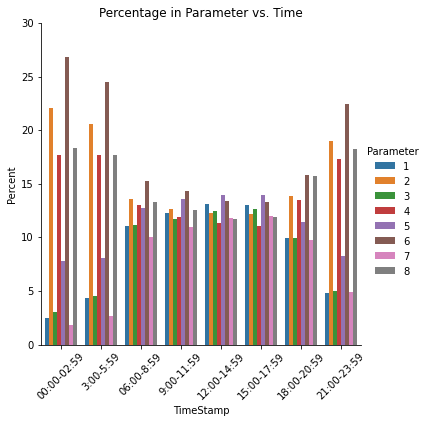

In [4]:
#Parameter vs time graph 

col_list = ["TimeStamp", "DeviceId", "EventId", "Parameter"]
df_spat = pd.read_csv('Signal_events.txt', delimiter = " ")


df_spat["TimeStamp"] = pd.to_datetime(df_spat["TimeStamp"])
time = pd.to_datetime(df_spat["TimeStamp"])

bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]

labels = ["00:00-02:59","3:00-5:59", "06:00-8:59","9:00-11:59", "12:00-14:59","15:00-17:59", "18:00-20:59", "21:00-23:59"]

#bins = [1,2,3,4,5, 6,7, 8,9,10, 11, 12,13, 14,15, 16, 17, 18,19, 20,21,22,23, 24]

#labels = ["0-1", "1-2", "2-3", "3-4", "4-5", "5-6", "6-7", "7-8", "8-9", "9-10", "11-12", "12-13"
#         , "13-14", "14-15", "15-16", "16-17", "17-18","18-19", "19-20", "20-21", "21-22", "22-23","23-24"]


df_spat["TimeStamp"] = pd.cut(df_spat.TimeStamp.dt.hour, bins, labels = labels, right=False)

df_spat8 = df_spat

#indexNames = df_spat8[(df_spat8['Parameter'] == 9) | (df_spat8['Parameter'] == 10) | (df_spat8['Parameter'] == 11) | (df_spat8['Parameter'] == 12)  | (df_spat8['Parameter'] == 13) | (df_spat8['Parameter'] == 14) | (df_spat8['Parameter'] == 15) | (df_spat8['Parameter'] == 16)].index
indexNames = df_spat8[(df_spat8['Parameter'] > 8)].index

# Delete these row indexes from dataFrame
df_spat8.drop(indexNames , inplace=True)

x,y = 'TimeStamp', 'Parameter'

df_y = df_spat8.groupby(x)[y].value_counts(normalize = True)
df_y = df_y.mul(100)
df_y = df_y.rename('Percent').reset_index()



#fig, barchart = plt.subplots()

barchart = sns.catplot(x=x, y='Percent', hue=y, kind='bar', data=df_y)
barchart.ax.set_ylim(0,30)
plt.xticks(rotation=45)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * 0.5)

#change_width(barchart, .35)

#plt.figure(figsize=(100,50))

plt.title("Percentage in Parameter vs. Time")

plt.show()

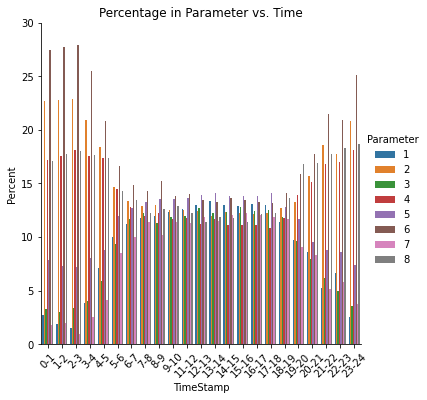

In [2]:
#Parameter vs time graph 

col_list = ["TimeStamp", "DeviceId", "EventId", "Parameter"]
df_spat = pd.read_csv('Signal_events.txt', delimiter = " ")


df_spat["TimeStamp"] = pd.to_datetime(df_spat["TimeStamp"])
time = pd.to_datetime(df_spat["TimeStamp"])

#bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]

#labels = ["00:00-02:59","3:00-5:59", "06:00-8:59","9:00-11:59", "12:00-14:59","15:00-17:59", "18:00-20:59", "21:00-23:59"]

bins = [1,2,3,4,5, 6,7, 8,9,10, 11, 12,13, 14,15, 16, 17, 18,19, 20,21,22,23, 24]

labels = ["0-1", "1-2", "2-3", "3-4", "4-5", "5-6", "6-7", "7-8", "8-9", "9-10", "11-12", "12-13"
         , "13-14", "14-15", "15-16", "16-17", "17-18","18-19", "19-20", "20-21", "21-22", "22-23","23-24"]


df_spat["TimeStamp"] = pd.cut(df_spat.TimeStamp.dt.hour, bins, labels = labels, right=False)

df_spat8 = df_spat

#indexNames = df_spat8[(df_spat8['Parameter'] == 9) | (df_spat8['Parameter'] == 10) | (df_spat8['Parameter'] == 11) | (df_spat8['Parameter'] == 12)  | (df_spat8['Parameter'] == 13) | (df_spat8['Parameter'] == 14) | (df_spat8['Parameter'] == 15) | (df_spat8['Parameter'] == 16)].index
indexNames = df_spat8[(df_spat8['Parameter'] > 8)].index

# Delete these row indexes from dataFrame
df_spat8.drop(indexNames , inplace=True)

x,y = 'TimeStamp', 'Parameter'

df_y = df_spat8.groupby(x)[y].value_counts(normalize = True)
df_y = df_y.mul(100)
df_y = df_y.rename('Percent').reset_index()



#fig, barchart = plt.subplots()

barchart = sns.catplot(x=x, y='Percent', hue=y, kind='bar', data=df_y)
barchart.ax.set_ylim(0,30)
plt.xticks(rotation=45)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * 0.5)

#change_width(barchart, .35)

#plt.figure(figsize=(100,50))

plt.title("Percentage in Parameter vs. Time")

plt.show()

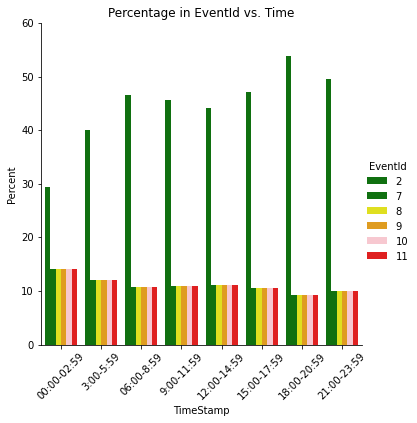

In [3]:
#EventID vs time graph 


col_list = ["TimeStamp", "DeviceId", "EventId", "Parameter"]
df_spat = pd.read_csv('Signal_events.txt', delimiter = " ")


df_spat["TimeStamp"] = pd.to_datetime(df_spat["TimeStamp"])
time = pd.to_datetime(df_spat["TimeStamp"])

bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]

labels = ["00:00-02:59","3:00-5:59", "06:00-8:59","9:00-11:59", "12:00-14:59","15:00-17:59", "18:00-20:59", "21:00-23:59"]

df_spat["TimeStamp"] = pd.cut(df_spat.TimeStamp.dt.hour, bins, labels = labels, right=False)

df_spat_ev = df_spat

indexNames = df_spat_ev[(df_spat_ev['EventId'] > 11) | (df_spat_ev['EventId'] == 1) | (df_spat_ev['EventId'] == 3) | (df_spat_ev['EventId'] == 4) | (df_spat_ev['EventId'] == 5) | (df_spat_ev['EventId'] == 6) | (df_spat_ev['EventId'] == 0)].index
# Delete these row indexes from dataFrame
df_spat_ev.drop(indexNames , inplace=True)

x,y = 'TimeStamp', 'EventId'

df_y = df_spat_ev.groupby(x)[y].value_counts(normalize = True)
df_y = df_y.mul(100)
df_y = df_y.rename('Percent').reset_index()



#fig, barchart = plt.subplots()

barchart = sns.catplot(x=x, y='Percent', hue=y, kind='bar', data=df_y, palette=sns.color_palette(['green', 'green', 'yellow', 'orange', 'pink', 'red']))
barchart.ax.set_ylim(0,60)
plt.xticks(rotation=45)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * 0.5)

#change_width(barchart, .35)

#plt.figure(figsize=(100,50))

plt.title("Percentage in EventId vs. Time")

plt.show()


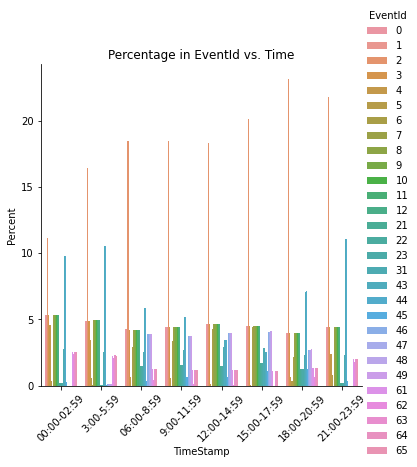

In [4]:
#EventID vs time graph 


col_list = ["TimeStamp", "DeviceId", "EventId", "Parameter"]
df_spat = pd.read_csv('Signal_events.txt', delimiter = " ")


df_spat["TimeStamp"] = pd.to_datetime(df_spat["TimeStamp"])
time = pd.to_datetime(df_spat["TimeStamp"])

bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]

labels = ["00:00-02:59","3:00-5:59", "06:00-8:59","9:00-11:59", "12:00-14:59","15:00-17:59", "18:00-20:59", "21:00-23:59"]

df_spat["TimeStamp"] = pd.cut(df_spat.TimeStamp.dt.hour, bins, labels = labels, right=False)

df_spat_ev = df_spat

#indexNames = df_spat_ev[(df_spat_ev['EventId'] > 11) | (df_spat_ev['EventId'] == 1) | (df_spat_ev['EventId'] == 3) | (df_spat_ev['EventId'] == 4) | (df_spat_ev['EventId'] == 5) | (df_spat_ev['EventId'] == 6) | (df_spat_ev['EventId'] == 0)].index
# Delete these row indexes from dataFrame
#df_spat_ev.drop(indexNames , inplace=True)

x,y = 'TimeStamp', 'EventId'

df_y = df_spat_ev.groupby(x)[y].value_counts(normalize = True)
df_y = df_y.mul(100)
df_y = df_y.rename('Percent').reset_index()



#fig, barchart = plt.subplots()

barchart = sns.catplot(x=x, y='Percent', hue=y, kind='bar', data=df_y)
plt.xticks(rotation=45)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * 0.5)

#change_width(barchart, .35)

#plt.figure(figsize=(100,50))

plt.title("Percentage in EventId vs. Time")

plt.show()


In [7]:
#Time Wasted Per Interval 

def laneTimeWastedPerInterval(laneid, TimeStamp1, TimeStamp2):
    
    #total number of green light starts (eventid 1 = green light start)
    lane_event_total = len(lanes[laneid][1])
    #print("Lane # {}\n".format(laneid))
   
    #print("Total number of green lights = ")
    #print(lane_event_total)

    total_green_time = pd.Timedelta(days=0)
    total_yellow_time = pd.Timedelta(days=0)
    total_red_time = pd.Timedelta(days=0)
    total_green_to_red_time = pd.Timedelta(days=0)
    
    total_time = TimeStamp2 - TimeStamp1

    #print(total_green_time)

    for i in range (lane_event_total):
        
        
        #counter = 0
        green_start_lane = lanes[laneid][1][i]     #eventid 1 = green_start
        green_end_lane = lanes[laneid][7][i]       # eventid 7 = green end
        yellow_start_lane = lanes[laneid][8][i]    #eventid 8 = yellow start
        yellow_end_lane = lanes[laneid][9][i]       #eventid 9 = yellow end
        red_start_lane = lanes[laneid][10][i]        #eventid 10 = red start
        red_end_lane = lanes[laneid][11][i]          #eventid 11 = red end  
        
        if ((TimeStamp1 < green_start_lane < TimeStamp2) & (TimeStamp1 < green_end_lane < TimeStamp2)):
                         
            green_time = green_end_lane - green_start_lane
            #print(green_start_lane)
            #print("passed green time test")
            total_green_time += green_time
            green_to_red = red_end_lane - green_start_lane
            total_green_to_red_time += green_to_red
            #counter += 1
        
        if ((TimeStamp1 < yellow_start_lane < TimeStamp2) & (TimeStamp1 < yellow_end_lane < TimeStamp2)):
            
            yellow_time = yellow_end_lane - yellow_start_lane
            #print(yellow_start_lane)
            #print("passed yellow time test")
            total_yellow_time += yellow_time
        
        if ((TimeStamp1 < red_start_lane < TimeStamp2) & (TimeStamp1 < red_end_lane < TimeStamp2)):
            
            red_time = red_end_lane - red_start_lane
            #print(red_start_lane)
            #print("passed red time test")
            total_red_time += red_time
        
        
    
        
        
        
        
        total_stop_time = total_time - total_green_to_red_time
        
    return (total_stop_time)



#INTERVAL 
print("Over Interval: ")
start_datetime_object = datetime.strptime('Jan 4 2021  7:00AM', '%b %d %Y %I:%M%p')
print(start_datetime_object)
print(" to ")

end_datetime_object = datetime.strptime('Jan 4 2021  1:00PM', '%b %d %Y %I:%M%p')
print(end_datetime_object)

print("\n\nTotal_Wait_time = ")
laneTimeWastedPerInterval(2, start_datetime_object, end_datetime_object)

Over Interval: 
2021-01-04 07:00:00
 to 
2021-01-04 13:00:00


Total_Wait_time = 


Timedelta('0 days 03:41:23')

In [16]:
#REAL FUNCTION 

def TimeWastedperHour():
    
    df_results = pd.DataFrame(columns=['Signal_Num', 'Time_Interval', 'Wait_Time'])

    for i in range (1,9):

            #Interval of Time Wasted per hour
        datetime_7AM = datetime.strptime('Jan 4 2021  7:00AM', '%b %d %Y %I:%M%p')
        datetime_8AM = datetime.strptime('Jan 4 2021  8:00AM', '%b %d %Y %I:%M%p')
        datetime_9AM = datetime.strptime('Jan 4 2021  9:00AM', '%b %d %Y %I:%M%p')
        datetime_10AM = datetime.strptime('Jan 4 2021  10:00AM', '%b %d %Y %I:%M%p')
        datetime_11AM = datetime.strptime('Jan 4 2021  11:00AM', '%b %d %Y %I:%M%p')
        datetime_12PM = datetime.strptime('Jan 4 2021  12:00PM', '%b %d %Y %I:%M%p')
        datetime_1PM = datetime.strptime('Jan 4 2021  1:00PM', '%b %d %Y %I:%M%p')
        datetime_2PM = datetime.strptime('Jan 4 2021  2:00PM', '%b %d %Y %I:%M%p')
        datetime_3PM = datetime.strptime('Jan 4 2021  3:00PM', '%b %d %Y %I:%M%p')
        datetime_4PM = datetime.strptime('Jan 4 2021  4:00PM', '%b %d %Y %I:%M%p')
        datetime_5PM = datetime.strptime('Jan 4 2021  5:00PM', '%b %d %Y %I:%M%p')
        datetime_6PM = datetime.strptime('Jan 4 2021  6:00PM', '%b %d %Y %I:%M%p')
        datetime_7PM = datetime.strptime('Jan 4 2021  7:00PM', '%b %d %Y %I:%M%p')
        datetime_8PM = datetime.strptime('Jan 4 2021  8:00PM', '%b %d %Y %I:%M%p')
        datetime_9PM = datetime.strptime('Jan 4 2021  9:00PM', '%b %d %Y %I:%M%p')
        datetime_10PM = datetime.strptime('Jan 4 2021  10:00PM', '%b %d %Y %I:%M%p')
        datetime_11PM = datetime.strptime('Jan 4 2021  11:00PM', '%b %d %Y %I:%M%p')
        datetime_12AM = datetime.strptime('Jan 5 2021  12:00AM', '%b %d %Y %I:%M%p')
        datetime_1AM = datetime.strptime('Jan 5 2021  1:00AM', '%b %d %Y %I:%M%p')
        datetime_2AM = datetime.strptime('Jan 5 2021  2:00AM', '%b %d %Y %I:%M%p')
        datetime_3AM = datetime.strptime('Jan 5 2021  3:00AM', '%b %d %Y %I:%M%p')
        datetime_4AM = datetime.strptime('Jan 5 2021  4:00AM', '%b %d %Y %I:%M%p')
        datetime_5AM = datetime.strptime('Jan 5 2021  5:00AM', '%b %d %Y %I:%M%p')
        datetime_6AM = datetime.strptime('Jan 5 2021  6:00AM', '%b %d %Y %I:%M%p')
        datetime_7AM_1 = datetime.strptime('Jan 5 2021  7:00AM', '%b %d %Y %I:%M%p')


        

        #print("\n\nTotal_Wait_time 0-1 = ")
        w = laneTimeWastedPerInterval(i, datetime_12AM, datetime_1AM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df0 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['0:00-1:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df0, ignore_index = True)


        #print("\n\nTotal_Wait_time 1-2 = ")
        w = laneTimeWastedPerInterval(i, datetime_1AM, datetime_2AM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df1 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['1:00-2:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df1, ignore_index = True)


        #print("\n\nTotal_Wait_time 2-3 = ")
        w = laneTimeWastedPerInterval(i, datetime_2AM, datetime_3AM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df2 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['2:00-3:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df2, ignore_index = True)


        #print("\n\nTotal_Wait_time 3-4 = ")
        w = laneTimeWastedPerInterval(i, datetime_3AM, datetime_4AM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df3 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['3:00-4:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df3, ignore_index = True)


        #print("\n\nTotal_Wait_time 4-5 = ")
        w = laneTimeWastedPerInterval(i, datetime_4AM, datetime_5AM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df4 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['4:00-5:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df4, ignore_index = True)


        #print("\n\nTotal_Wait_time 5-6 = ")
        w = laneTimeWastedPerInterval(i, datetime_5AM, datetime_6AM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df5 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['5:00-6:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df5, ignore_index = True)


        #print("\n\nTotal_Wait_time 6-7 = ")
        w =laneTimeWastedPerInterval(i, datetime_6AM, datetime_7AM_1)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df6 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['6:00-7:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df6, ignore_index = True)


        #print("\n\nTotal_Wait_time 7-8 = ")
        w = laneTimeWastedPerInterval(i, datetime_7AM, datetime_8AM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df7 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['7:00-8:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df7, ignore_index = True)


        #print("\n\nTotal_Wait_time 8-9 = ")
        w = laneTimeWastedPerInterval(i, datetime_8AM, datetime_9AM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df8 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['8:00-9:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df8, ignore_index = True)


        #print("\n\nTotal_Wait_time 9-10 = ")
        w = laneTimeWastedPerInterval(i, datetime_9AM, datetime_10AM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df9 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['9:00-10:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df9, ignore_index = True)


        #print("\n\nTotal_Wait_time 10-11 = ")
        w = laneTimeWastedPerInterval(i, datetime_10AM, datetime_11AM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df10 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['10:00-11:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df10, ignore_index = True)


        #print("\n\nTotal_Wait_time 11-12 = ")
        w = laneTimeWastedPerInterval(i, datetime_11AM, datetime_12PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df11= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['11:00-12:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df11, ignore_index = True)


        #print("\n\nTotal_Wait_time 12-13 = ")
        w = laneTimeWastedPerInterval(i, datetime_12PM, datetime_1PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df12= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['12:00-13:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df12, ignore_index = True)


        #print("\n\nTotal_Wait_time 13-14 = ")
        w = laneTimeWastedPerInterval(i, datetime_1PM, datetime_2PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df13= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['13:00-14:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df13, ignore_index = True)


        #print("\n\nTotal_Wait_time 14-15 = ")
        w = laneTimeWastedPerInterval(i, datetime_2PM, datetime_3PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df14= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['14:00-15:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df14, ignore_index = True)


        #print("\n\nTotal_Wait_time 15-16 = ")
        w = laneTimeWastedPerInterval(i, datetime_3PM, datetime_4PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df15= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['15:00-16:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df15, ignore_index = True)


        #print("\n\nTotal_Wait_time 16-17 = ")
        w = laneTimeWastedPerInterval(i, datetime_4PM, datetime_5PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df16= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['16:00-17:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df16, ignore_index = True)


        #print("\n\nTotal_Wait_time 17-18 = ")
        w = laneTimeWastedPerInterval(i, datetime_5PM, datetime_6PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df17= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['17:00-18:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df17, ignore_index = True)
        #print(df_results)

        #print("\n\nTotal_Wait_time 18-19 = ")
        w = laneTimeWastedPerInterval(i, datetime_6PM, datetime_7PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df18= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['18:00-19:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df18, ignore_index = True)


        #print("\n\nTotal_Wait_time 19-20 = ")
        w = laneTimeWastedPerInterval(i, datetime_7PM, datetime_8PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df19= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['19:00-20:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df19, ignore_index = True)


        #print("\n\nTotal_Wait_time 20-21 = ")
        w = laneTimeWastedPerInterval(i, datetime_8PM, datetime_9PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df20= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['20:00-21:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df20, ignore_index = True)


        #print("\n\nTotal_Wait_time 21-22 = ")
        w = laneTimeWastedPerInterval(i, datetime_9PM, datetime_10PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df21= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['21:00-22:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df21, ignore_index = True)


        #print("\n\nTotal_Wait_time 22-23 = ")
        w = laneTimeWastedPerInterval(i, datetime_10PM, datetime_11PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df22= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['22:00-23:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df22, ignore_index = True)


        #print("\n\nTotal_Wait_time 23-24 = ")
        w = laneTimeWastedPerInterval(i, datetime_11PM, datetime_12AM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df23= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['23:00-24:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df23, ignore_index = True)


        #print(df_results)

    filename = "time_wasted_per_signal_per_hour.csv"

    df_results.to_csv(filename, encoding = 'utf-8', index=False)
    

TimeWastedperHour()

In [17]:
#REAL FUNCTION 

def TimeWastedperHour():
    
    df_results = pd.DataFrame(columns=['Signal_Num', 'Time_Interval', 'Wait_Time'])

    for i in range (1,9):

            #Interval of Time Wasted per hour
        datetime_7AM = datetime.strptime('Jan 4 2021  7:00AM', '%b %d %Y %I:%M%p')
        datetime_8AM = datetime.strptime('Jan 4 2021  8:00AM', '%b %d %Y %I:%M%p')
        datetime_9AM = datetime.strptime('Jan 4 2021  9:00AM', '%b %d %Y %I:%M%p')
        datetime_10AM = datetime.strptime('Jan 4 2021  10:00AM', '%b %d %Y %I:%M%p')
        datetime_11AM = datetime.strptime('Jan 4 2021  11:00AM', '%b %d %Y %I:%M%p')
        datetime_12PM = datetime.strptime('Jan 4 2021  12:00PM', '%b %d %Y %I:%M%p')
        datetime_1PM = datetime.strptime('Jan 4 2021  1:00PM', '%b %d %Y %I:%M%p')
        datetime_2PM = datetime.strptime('Jan 4 2021  2:00PM', '%b %d %Y %I:%M%p')
        datetime_3PM = datetime.strptime('Jan 4 2021  3:00PM', '%b %d %Y %I:%M%p')
        datetime_4PM = datetime.strptime('Jan 4 2021  4:00PM', '%b %d %Y %I:%M%p')
        datetime_5PM = datetime.strptime('Jan 4 2021  5:00PM', '%b %d %Y %I:%M%p')
        datetime_6PM = datetime.strptime('Jan 4 2021  6:00PM', '%b %d %Y %I:%M%p')
        datetime_7PM = datetime.strptime('Jan 4 2021  7:00PM', '%b %d %Y %I:%M%p')
        datetime_8PM = datetime.strptime('Jan 4 2021  8:00PM', '%b %d %Y %I:%M%p')
        datetime_9PM = datetime.strptime('Jan 4 2021  9:00PM', '%b %d %Y %I:%M%p')
        datetime_10PM = datetime.strptime('Jan 4 2021  10:00PM', '%b %d %Y %I:%M%p')
        datetime_11PM = datetime.strptime('Jan 4 2021  11:00PM', '%b %d %Y %I:%M%p')
        datetime_12AM = datetime.strptime('Jan 5 2021  12:00AM', '%b %d %Y %I:%M%p')
        datetime_1AM = datetime.strptime('Jan 5 2021  1:00AM', '%b %d %Y %I:%M%p')
        datetime_2AM = datetime.strptime('Jan 5 2021  2:00AM', '%b %d %Y %I:%M%p')
        datetime_3AM = datetime.strptime('Jan 5 2021  3:00AM', '%b %d %Y %I:%M%p')
        datetime_4AM = datetime.strptime('Jan 5 2021  4:00AM', '%b %d %Y %I:%M%p')
        datetime_5AM = datetime.strptime('Jan 5 2021  5:00AM', '%b %d %Y %I:%M%p')
        datetime_6AM = datetime.strptime('Jan 5 2021  6:00AM', '%b %d %Y %I:%M%p')
        datetime_7AM_1 = datetime.strptime('Jan 5 2021  7:00AM', '%b %d %Y %I:%M%p')


        

        #print("\n\nTotal_Wait_time 0-1 = ")
        w = laneTimeWastedPerInterval(i, datetime_12AM, datetime_1AM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df0 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['0:00-1:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df0, ignore_index = True)


        #print("\n\nTotal_Wait_time 1-2 = ")
        w = laneTimeWastedPerInterval(i, datetime_1AM, datetime_2AM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df1 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['1:00-2:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df1, ignore_index = True)


        #print("\n\nTotal_Wait_time 2-3 = ")
        w = laneTimeWastedPerInterval(i, datetime_2AM, datetime_3AM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df2 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['2:00-3:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df2, ignore_index = True)


        #print("\n\nTotal_Wait_time 3-4 = ")
        w = laneTimeWastedPerInterval(i, datetime_3AM, datetime_4AM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df3 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['3:00-4:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df3, ignore_index = True)


        #print("\n\nTotal_Wait_time 4-5 = ")
        w = laneTimeWastedPerInterval(i, datetime_4AM, datetime_5AM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df4 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['4:00-5:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df4, ignore_index = True)


        #print("\n\nTotal_Wait_time 5-6 = ")
        w = laneTimeWastedPerInterval(i, datetime_5AM, datetime_6AM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df5 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['5:00-6:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df5, ignore_index = True)


        #print("\n\nTotal_Wait_time 6-7 = ")
        w =laneTimeWastedPerInterval(i, datetime_6AM, datetime_7AM_1)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df6 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['6:00-7:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df6, ignore_index = True)


        #print("\n\nTotal_Wait_time 7-8 = ")
        w = laneTimeWastedPerInterval(i, datetime_7AM, datetime_8AM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df7 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['7:00-8:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df7, ignore_index = True)


        #print("\n\nTotal_Wait_time 8-9 = ")
        w = laneTimeWastedPerInterval(i, datetime_8AM, datetime_9AM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df8 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['8:00-9:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df8, ignore_index = True)


        #print("\n\nTotal_Wait_time 9-10 = ")
        w = laneTimeWastedPerInterval(i, datetime_9AM, datetime_10AM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df9 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['9:00-10:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df9, ignore_index = True)


        #print("\n\nTotal_Wait_time 10-11 = ")
        w = laneTimeWastedPerInterval(i, datetime_10AM, datetime_11AM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df10 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['10:00-11:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df10, ignore_index = True)


        #print("\n\nTotal_Wait_time 11-12 = ")
        w = laneTimeWastedPerInterval(i, datetime_11AM, datetime_12PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df11= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['11:00-12:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df11, ignore_index = True)


        #print("\n\nTotal_Wait_time 12-13 = ")
        w = laneTimeWastedPerInterval(i, datetime_12PM, datetime_1PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df12= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['12:00-13:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df12, ignore_index = True)


        #print("\n\nTotal_Wait_time 13-14 = ")
        w = laneTimeWastedPerInterval(i, datetime_1PM, datetime_2PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df13= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['13:00-14:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df13, ignore_index = True)


        #print("\n\nTotal_Wait_time 14-15 = ")
        w = laneTimeWastedPerInterval(i, datetime_2PM, datetime_3PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df14= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['14:00-15:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df14, ignore_index = True)


        #print("\n\nTotal_Wait_time 15-16 = ")
        w = laneTimeWastedPerInterval(i, datetime_3PM, datetime_4PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df15= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['15:00-16:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df15, ignore_index = True)


        #print("\n\nTotal_Wait_time 16-17 = ")
        w = laneTimeWastedPerInterval(i, datetime_4PM, datetime_5PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df16= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['16:00-17:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df16, ignore_index = True)


        #print("\n\nTotal_Wait_time 17-18 = ")
        w = laneTimeWastedPerInterval(i, datetime_5PM, datetime_6PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df17= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['17:00-18:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df17, ignore_index = True)
        #print(df_results)

        #print("\n\nTotal_Wait_time 18-19 = ")
        w = laneTimeWastedPerInterval(i, datetime_6PM, datetime_7PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df18= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['18:00-19:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df18, ignore_index = True)


        #print("\n\nTotal_Wait_time 19-20 = ")
        w = laneTimeWastedPerInterval(i, datetime_7PM, datetime_8PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df19= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['19:00-20:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df19, ignore_index = True)


        #print("\n\nTotal_Wait_time 20-21 = ")
        w = laneTimeWastedPerInterval(i, datetime_8PM, datetime_9PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df20= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['20:00-21:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df20, ignore_index = True)


        #print("\n\nTotal_Wait_time 21-22 = ")
        w = laneTimeWastedPerInterval(i, datetime_9PM, datetime_10PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df21= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['21:00-22:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df21, ignore_index = True)


        #print("\n\nTotal_Wait_time 22-23 = ")
        w = laneTimeWastedPerInterval(i, datetime_10PM, datetime_11PM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df22= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['22:00-23:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df22, ignore_index = True)


        #print("\n\nTotal_Wait_time 23-24 = ")
        w = laneTimeWastedPerInterval(i, datetime_11PM, datetime_12AM)
        if (i == 4 or i ==8):
            w = w - pd.Timedelta(hours=1)
        df23= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['23:00-24:00'], 'Wait_Time': [w]})
        df_results = df_results.append(df23, ignore_index = True)


        #print(df_results)

    filename = "time_wasted_per_signal_per_hour.csv"

    df_results.to_csv(filename, encoding = 'utf-8', index=False)
    

TimeWastedperHour()

     Signal_Num Time_Interval  Wait_Time
0             1     0:00-1:00       3543
1             1     1:00-2:00       3559
2             1     2:00-3:00       3576
3             1     3:00-4:00       3583
4             1     4:00-5:00       3563
..          ...           ...        ...
187           8   19:00-20:00       2197
188           8   20:00-21:00       2168
189           8   21:00-22:00       2364
190           8   22:00-23:00       2319
191           8   23:00-24:00       2314

[192 rows x 3 columns]


Text(0.5, 1.0, 'Wait Time Per Hour (seconds) vs. Time and Signal ID')

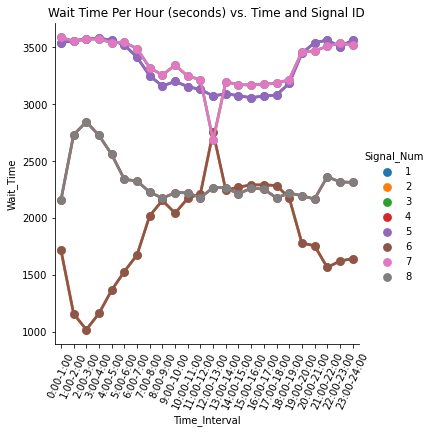

In [9]:
TimeWastedperHour()

df_results = pd.read_csv("time_wasted_per_signal_per_hour.csv")

df_numeric = df_results

df_numeric["Wait_Time"] = pd.to_timedelta(df_numeric["Wait_Time"])

wait_time_series = df_numeric['Wait_Time']

series = wait_time_series.dt.seconds

df_numeric['Wait_Time'] = series

print(df_numeric)

line = sns.catplot(x = "Time_Interval", y = "Wait_Time", hue = "Signal_Num", kind="point", data = df_numeric)
plt.xticks(rotation=65)
#line.ax.set_ylim(0,3600)

plt.title("Wait Time Per Hour (seconds) vs. Time and Signal ID")



In [18]:
#Time Wasted Per Interval 

def laneAvg_Wait_Time_PerInterval(laneid, TimeStamp1, TimeStamp2):
    
    #total number of green light starts (eventid 1 = green light start)
    lane_event_total = len(lanes[laneid][1])
    #print("Lane # {}\n".format(laneid))
   
    #print("Total number of green lights = ")
    #print(lane_event_total)

    total_green_time = pd.Timedelta(days=0)
    total_yellow_time = pd.Timedelta(days=0)
    total_red_time = pd.Timedelta(days=0)
    total_green_to_red_time = pd.Timedelta(days=0)
    
    total_time = TimeStamp2 - TimeStamp1

    #print(total_green_time)
    counter = 0  # count number of lane events (green lights) per interval

    for i in range (lane_event_total):
        
        
        
        green_start_lane = lanes[laneid][1][i]     #eventid 1 = green_start
        green_end_lane = lanes[laneid][7][i]       # eventid 7 = green end
        yellow_start_lane = lanes[laneid][8][i]    #eventid 8 = yellow start
        yellow_end_lane = lanes[laneid][9][i]       #eventid 9 = yellow end
        red_start_lane = lanes[laneid][10][i]        #eventid 10 = red start
        red_end_lane = lanes[laneid][11][i]          #eventid 11 = red end  
        
        if ((TimeStamp1 < green_start_lane < TimeStamp2) & (TimeStamp1 < green_end_lane < TimeStamp2)):
                         
            green_time = green_end_lane - green_start_lane
            #print(green_start_lane)
            #print("passed green time test")
            total_green_time += green_time
            green_to_red = red_end_lane - green_start_lane
            total_green_to_red_time += green_to_red
            counter += 1
            #print(counter)
        
        if ((TimeStamp1 < yellow_start_lane < TimeStamp2) & (TimeStamp1 < yellow_end_lane < TimeStamp2)):
            
            yellow_time = yellow_end_lane - yellow_start_lane
            #print(yellow_start_lane)
            #print("passed yellow time test")
            total_yellow_time += yellow_time
        
        if ((TimeStamp1 < red_start_lane < TimeStamp2) & (TimeStamp1 < red_end_lane < TimeStamp2)):
            
            red_time = red_end_lane - red_start_lane
            #print(red_start_lane)
            #print("passed red time test")
            total_red_time += red_time
        
        
    
        
        
        
        
    total_stop_time = total_time - total_green_to_red_time
        
    if laneid == 1 or laneid ==3 or laneid ==5 or laneid ==7:                  #scaling for OFF TIME PERIODS
        
        if (0 <= TimeStamp1.hour <= 7 or 19 <= TimeStamp1.hour <= 24):
            
            counter = 50
        
        
    average_wait_time = total_stop_time / (counter * 2) #half cars get red, half get green so mulitply green counter by 2
    #print(laneid)   
    #print(counter)
    return (average_wait_time)



#INTERVAL 
print("Over Interval: ")
start_datetime_object = datetime.strptime('Jan 4 2021  11:00PM', '%b %d %Y %I:%M%p')
print(start_datetime_object)
print(start_datetime_object.hour)
print(" to ")

end_datetime_object = datetime.strptime('Jan 5 2021  1:00AM', '%b %d %Y %I:%M%p')
print(end_datetime_object)

print("\n\nAverage_Wait_time = ")
laneAvg_Wait_Time_PerInterval(7, start_datetime_object, end_datetime_object)

Over Interval: 
2021-01-04 23:00:00
23
 to 
2021-01-05 01:00:00


Average_Wait_time = 


Timedelta('0 days 00:01:11.090000')

In [11]:
#REAL FUNCTION 

def AvgWaitTimeperHour():
    
    df_avg_results = pd.DataFrame(columns=['Signal_Num', 'Time_Interval', 'Wait_Time'])

    for i in range (1,9):

            #Interval of Time Wasted per hour
        datetime_7AM = datetime.strptime('Jan 4 2021  7:00AM', '%b %d %Y %I:%M%p')
        datetime_8AM = datetime.strptime('Jan 4 2021  8:00AM', '%b %d %Y %I:%M%p')
        datetime_9AM = datetime.strptime('Jan 4 2021  9:00AM', '%b %d %Y %I:%M%p')
        datetime_10AM = datetime.strptime('Jan 4 2021  10:00AM', '%b %d %Y %I:%M%p')
        datetime_11AM = datetime.strptime('Jan 4 2021  11:00AM', '%b %d %Y %I:%M%p')
        datetime_12PM = datetime.strptime('Jan 4 2021  12:00PM', '%b %d %Y %I:%M%p')
        datetime_1PM = datetime.strptime('Jan 4 2021  1:00PM', '%b %d %Y %I:%M%p')
        datetime_2PM = datetime.strptime('Jan 4 2021  2:00PM', '%b %d %Y %I:%M%p')
        datetime_3PM = datetime.strptime('Jan 4 2021  3:00PM', '%b %d %Y %I:%M%p')
        datetime_4PM = datetime.strptime('Jan 4 2021  4:00PM', '%b %d %Y %I:%M%p')
        datetime_5PM = datetime.strptime('Jan 4 2021  5:00PM', '%b %d %Y %I:%M%p')
        datetime_6PM = datetime.strptime('Jan 4 2021  6:00PM', '%b %d %Y %I:%M%p')
        datetime_7PM = datetime.strptime('Jan 4 2021  7:00PM', '%b %d %Y %I:%M%p')
        datetime_8PM = datetime.strptime('Jan 4 2021  8:00PM', '%b %d %Y %I:%M%p')
        datetime_9PM = datetime.strptime('Jan 4 2021  9:00PM', '%b %d %Y %I:%M%p')
        datetime_10PM = datetime.strptime('Jan 4 2021  10:00PM', '%b %d %Y %I:%M%p')
        datetime_11PM = datetime.strptime('Jan 4 2021  11:00PM', '%b %d %Y %I:%M%p')
        datetime_12AM = datetime.strptime('Jan 5 2021  12:00AM', '%b %d %Y %I:%M%p')
        datetime_1AM = datetime.strptime('Jan 5 2021  1:00AM', '%b %d %Y %I:%M%p')
        datetime_2AM = datetime.strptime('Jan 5 2021  2:00AM', '%b %d %Y %I:%M%p')
        datetime_3AM = datetime.strptime('Jan 5 2021  3:00AM', '%b %d %Y %I:%M%p')
        datetime_4AM = datetime.strptime('Jan 5 2021  4:00AM', '%b %d %Y %I:%M%p')
        datetime_5AM = datetime.strptime('Jan 5 2021  5:00AM', '%b %d %Y %I:%M%p')
        datetime_6AM = datetime.strptime('Jan 5 2021  6:00AM', '%b %d %Y %I:%M%p')
        datetime_7AM_1 = datetime.strptime('Jan 5 2021  7:00AM', '%b %d %Y %I:%M%p')


        

        #print("\n\nTotal_Wait_time 0-1 = ")
        w = laneAvg_Wait_Time_PerInterval(i, datetime_12AM, datetime_1AM)
        df0 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['0:00-1:00'], 'Wait_Time': [w]})
        df_avg_results = df_avg_results.append(df0, ignore_index = True)


        #print("\n\nTotal_Wait_time 1-2 = ")
        w = laneAvg_Wait_Time_PerInterval(i, datetime_1AM, datetime_2AM)
        df1 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['1:00-2:00'], 'Wait_Time': [w]})
        df_avg_results = df_avg_results.append(df1, ignore_index = True)


        #print("\n\nTotal_Wait_time 2-3 = ")
        w = laneAvg_Wait_Time_PerInterval(i, datetime_2AM, datetime_3AM)
        df2 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['2:00-3:00'], 'Wait_Time': [w]})
        df_avg_results = df_avg_results.append(df2, ignore_index = True)


        #print("\n\nTotal_Wait_time 3-4 = ")
        w = laneAvg_Wait_Time_PerInterval(i, datetime_3AM, datetime_4AM)
        df3 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['3:00-4:00'], 'Wait_Time': [w]})
        df_avg_results = df_avg_results.append(df3, ignore_index = True)


        #print("\n\nTotal_Wait_time 4-5 = ")
        w = laneAvg_Wait_Time_PerInterval(i, datetime_4AM, datetime_5AM)
        df4 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['4:00-5:00'], 'Wait_Time': [w]})
        df_avg_results = df_avg_results.append(df4, ignore_index = True)


        #print("\n\nTotal_Wait_time 5-6 = ")
        w = laneAvg_Wait_Time_PerInterval(i, datetime_5AM, datetime_6AM)
        df5 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['5:00-6:00'], 'Wait_Time': [w]})
        df_avg_results = df_avg_results.append(df5, ignore_index = True)


        #print("\n\nTotal_Wait_time 6-7 = ")
        w =laneAvg_Wait_Time_PerInterval(i, datetime_6AM, datetime_7AM_1)
        df6 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['6:00-7:00'], 'Wait_Time': [w]})
        df_avg_results = df_avg_results.append(df6, ignore_index = True)


        #print("\n\nTotal_Wait_time 7-8 = ")
        w = laneAvg_Wait_Time_PerInterval(i, datetime_7AM, datetime_8AM)
        df7 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['7:00-8:00'], 'Wait_Time': [w]})
        df_avg_results = df_avg_results.append(df7, ignore_index = True)


        #print("\n\nTotal_Wait_time 8-9 = ")
        w = laneAvg_Wait_Time_PerInterval(i, datetime_8AM, datetime_9AM)
        df8 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['8:00-9:00'], 'Wait_Time': [w]})
        df_avg_results = df_avg_results.append(df8, ignore_index = True)


        #print("\n\nTotal_Wait_time 9-10 = ")
        w = laneAvg_Wait_Time_PerInterval(i, datetime_9AM, datetime_10AM)
        df9 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['9:00-10:00'], 'Wait_Time': [w]})
        df_avg_results = df_avg_results.append(df9, ignore_index = True)


        #print("\n\nTotal_Wait_time 10-11 = ")
        w = laneAvg_Wait_Time_PerInterval(i, datetime_10AM, datetime_11AM)
        df10 = pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['10:00-11:00'], 'Wait_Time': [w]})
        df_avg_results = df_avg_results.append(df10, ignore_index = True)


        #print("\n\nTotal_Wait_time 11-12 = ")
        w = laneAvg_Wait_Time_PerInterval(i, datetime_11AM, datetime_12PM)
        df11= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['11:00-12:00'], 'Wait_Time': [w]})
        df_avg_results = df_avg_results.append(df11, ignore_index = True)


        #print("\n\nTotal_Wait_time 12-13 = ")
        w = laneAvg_Wait_Time_PerInterval(i, datetime_12PM, datetime_1PM)
        df12= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['12:00-13:00'], 'Wait_Time': [w]})
        df_avg_results = df_avg_results.append(df12, ignore_index = True)


        #print("\n\nTotal_Wait_time 13-14 = ")
        w = laneAvg_Wait_Time_PerInterval(i, datetime_1PM, datetime_2PM)
        df13= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['13:00-14:00'], 'Wait_Time': [w]})
        df_avg_results = df_avg_results.append(df13, ignore_index = True)


        #print("\n\nTotal_Wait_time 14-15 = ")
        w = laneAvg_Wait_Time_PerInterval(i, datetime_2PM, datetime_3PM)
        df14= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['14:00-15:00'], 'Wait_Time': [w]})
        df_avg_results = df_avg_results.append(df14, ignore_index = True)


        #print("\n\nTotal_Wait_time 15-16 = ")
        w = laneAvg_Wait_Time_PerInterval(i, datetime_3PM, datetime_4PM)
        df15= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['15:00-16:00'], 'Wait_Time': [w]})
        df_avg_results = df_avg_results.append(df15, ignore_index = True)


        #print("\n\nTotal_Wait_time 16-17 = ")
        w = laneAvg_Wait_Time_PerInterval(i, datetime_4PM, datetime_5PM)
        df16= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['16:00-17:00'], 'Wait_Time': [w]})
        df_avg_results = df_avg_results.append(df16, ignore_index = True)


        #print("\n\nTotal_Wait_time 17-18 = ")
        w = laneAvg_Wait_Time_PerInterval(i, datetime_5PM, datetime_6PM)
        df17= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['17:00-18:00'], 'Wait_Time': [w]})
        df_avg_results = df_avg_results.append(df17, ignore_index = True)
        #print(df_results)

        #print("\n\nTotal_Wait_time 18-19 = ")
        w = laneAvg_Wait_Time_PerInterval(i, datetime_6PM, datetime_7PM)
        df18= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['18:00-19:00'], 'Wait_Time': [w]})
        df_avg_results = df_avg_results.append(df18, ignore_index = True)


        #print("\n\nTotal_Wait_time 19-20 = ")
        w = laneAvg_Wait_Time_PerInterval(i, datetime_7PM, datetime_8PM)
        df19= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['19:00-20:00'], 'Wait_Time': [w]})
        df_avg_results = df_avg_results.append(df19, ignore_index = True)


        #print("\n\nTotal_Wait_time 20-21 = ")
        w = laneAvg_Wait_Time_PerInterval(i, datetime_8PM, datetime_9PM)
        df20= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['20:00-21:00'], 'Wait_Time': [w]})
        df_avg_results = df_avg_results.append(df20, ignore_index = True)


        #print("\n\nTotal_Wait_time 21-22 = ")
        w = laneAvg_Wait_Time_PerInterval(i, datetime_9PM, datetime_10PM)
        df21= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['21:00-22:00'], 'Wait_Time': [w]})
        df_avg_results = df_avg_results.append(df21, ignore_index = True)


        #print("\n\nTotal_Wait_time 22-23 = ")
        w = laneAvg_Wait_Time_PerInterval(i, datetime_10PM, datetime_11PM)
        
        df22= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['22:00-23:00'], 'Wait_Time': [w]})
        df_avg_results = df_avg_results.append(df22, ignore_index = True)


        #print("\n\nTotal_Wait_time 23-24 = ")
        w = laneAvg_Wait_Time_PerInterval(i, datetime_11PM, datetime_12AM)
        df23= pd.DataFrame({'Signal_Num' : [i], 'Time_Interval': ['23:00-24:00'], 'Wait_Time': [w]})
        df_avg_results = df_avg_results.append(df23, ignore_index = True)


        #print(df_results)

    filename = "avg_wait_time_per_hour.csv"

    df_avg_results.to_csv(filename, encoding = 'utf-8', index=False)
    

AvgWaitTimeperHour()

     Signal_Num Time_Interval  Wait_Time
0             1     0:00-1:00         35
1             1     1:00-2:00         35
2             1     2:00-3:00         35
3             1     3:00-4:00         35
4             1     4:00-5:00         35
..          ...           ...        ...
187           8   19:00-20:00         87
188           8   20:00-21:00         82
189           8   21:00-22:00         67
190           8   22:00-23:00         68
191           8   23:00-24:00         59

[192 rows x 3 columns]


Text(0.5, 1.0, 'Average Signal Wait Time (seconds) vs. Time')

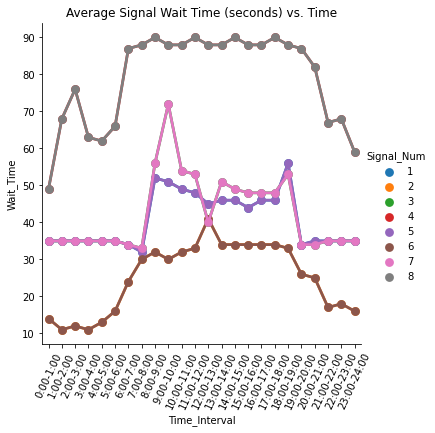

In [19]:
AvgWaitTimeperHour()

df_resultsAVG = pd.read_csv("avg_wait_time_per_hour.csv")

df_numeric_avg = df_resultsAVG

df_numeric_avg["Wait_Time"] = pd.to_timedelta(df_numeric_avg["Wait_Time"])

avg_wait_time_series = df_numeric_avg['Wait_Time']

series = avg_wait_time_series.dt.seconds

df_numeric_avg['Wait_Time'] = series

print(df_numeric_avg)

line = sns.catplot(x = "Time_Interval", y = "Wait_Time", hue = "Signal_Num", kind="point", data = df_numeric_avg)
plt.xticks(rotation=65)
#line.ax.set_ylim(0,2000)

plt.title("Average Signal Wait Time (seconds) vs. Time")


In [20]:
#Get Volume Counts from Lane File

cols_list = ['straight_2-1', 'straight_2-2', 'straight_2-3', 'left_1-1', 'left_1-2', 'F', 
            'straight_4-1', 'straight_4-2', 'straight_4-3', 'left_5-1', 'left_5-2', 'L',
            'straight_6-1', 'straight_6-2', 'straight_6-3', 'left_3-1', 'left_3-2', 'R',
            'straight_8-1', 'straight_8-2', 'straight_8-3', 'left_7-1', 'left_7-2']

#upload CSV LANE FILE into df_vol dataframe

df_vol = pd.read_csv("data_file_updated.csv", header=None, names = cols_list)

#Drop empty gap columns

df_vol = df_vol.drop(['F', 'L', 'R'], axis=1)

#Drop Last two rows

df_vol = df_vol.iloc[:-2, :]

df_vol = df_vol.iloc[1: , : ]  # drop first row (bad values)

df_vol = df_vol.reset_index()  #reset index

#Convert all values to INTEGERS

df_vol = df_vol.apply(pd.to_numeric)

df_vol_counts = pd.DataFrame(columns = ['Vol_1', "Vol_2", "Vol_3", "Vol_4", "Vol_5", "Vol_6", "Vol_7", "Vol_8"])

#GET VOLUME COUNTS INTO DF

for i in range(len(df_vol)):
    
    #signal 1 sum
    df_vol_counts.loc[i, 'Vol_1'] = df_vol.loc[i, 'left_1-1'] + df_vol.loc[i, 'left_1-2']
    #signal 2 sum
    df_vol_counts.loc[i, 'Vol_2'] = df_vol.loc[i, 'straight_2-1'] + df_vol.loc[i, 'straight_2-2']+ df_vol.loc[i, 'straight_2-3']
    #signal 3 sum
    df_vol_counts.loc[i, 'Vol_3'] = df_vol.loc[i, 'left_3-1'] + df_vol.loc[i, 'left_3-2']
    #signal 4 sum
    df_vol_counts.loc[i, 'Vol_4'] = df_vol.loc[i, 'straight_4-1'] + df_vol.loc[i, 'straight_4-2']+ df_vol.loc[i, 'straight_4-3']
    #signal 5 sum
    df_vol_counts.loc[i, 'Vol_5'] = df_vol.loc[i, 'left_5-1'] + df_vol.loc[i, 'left_5-2']
    #signal 6 sum
    df_vol_counts.loc[i, 'Vol_6'] = df_vol.loc[i, 'straight_6-1'] + df_vol.loc[i, 'straight_6-2']+ df_vol.loc[i, 'straight_6-3']
    #signal 7 sum
    df_vol_counts.loc[i, 'Vol_7'] = df_vol.loc[i, 'left_7-1'] + df_vol.loc[i, 'left_7-2']
    #signal 8 sum
    df_vol_counts.loc[i, 'Vol_8'] = df_vol.loc[i, 'straight_8-1'] + df_vol.loc[i, 'straight_8-2']+ df_vol.loc[i, 'straight_8-3']
    
    
print(df_vol_counts)   

df_vol_counts.to_csv("df_Vol_Counts.csv", encoding = 'utf-8', index=False)

#Combine to 1 COLUMN TO ADD TO DF_NUMERIC dataframe

clist =  ["Vol_2", "Vol_3", "Vol_4", "Vol_5", "Vol_6", "Vol_7", "Vol_8"]

df_V = df_vol_counts['Vol_1']

for col in clist:
    
    df_V = df_V.append(df_vol_counts[col], ignore_index=True)

print(df_V)

df_V.to_csv("df_Volume1.csv", encoding = 'utf-8', index=False)

   Vol_1 Vol_2 Vol_3 Vol_4 Vol_5 Vol_6 Vol_7 Vol_8
0     85   363    33   479   102   294    46   435
1     84   226    33   319    66   219    17   282
2     67   149    17   260    49   158    11   233
3     94    81    10   201    30   135     2   178
4     46    65     8   128    15    72    11   110
5     84   226    33   319    66   219    17   282
6     14    68    19    59    18    45     9    62
7     33   105    17   140    29    87    12   119
8     39   216    44   244    71   177    31   226
9     82   488    88   491   144   330   109   455
10   105   719   100   631   213   441    56   604
11   136   908   108   839   227   581    66   778
12   144  1017    98   959   307   697    71   917
13   191   991    89  1060   251   788    69  1015
14   170  1005   124  1081   241   814    52  1024
15   169  1029   115  1095   200   867    50  1041
16   174  1067    95  1133   255   900    71  1104
17   170   986   117  1096   205   833    89  1046
18   195  1013   117  1138   24

In [21]:
#Add TRAFFIC VOLUME TO WEIGHT THE ABOVE TIME 
#VOLUME DATA PER HOUR


#ADD Column "Vol_Weight" TO DF_NUMERIC to weight EACH INTERVAL's wait_time 

df_numeric_avg["Vol_Weight"] = df_V   #df_V stores the volumet counts in one column


#ADD Empty Column "Scaled_Wait_Time" to store the weighted Intervals' wait times

df_numeric_avg["Scaled_Wait_Time"] = ''

#ADD Empty Column "Norm_Wait_Time"  to get normalized wait time divided by total number of cars

df_numeric_avg["Norm_Wait_Time"] = ''



#print(df_numeric_avg)


#FUNCTION ACCEPTS DATA FRAME WITH COLUMNS : Signal_Num, Time_Interval  Wait_Time, Vol_Weight, Scaled_Weight_Time, Norm_Wait_Time

def Time_Wasted_scaled_TrafficVolume(df):
    

    df_i = df

    for i in range(len(df)):
            
        weighted_time =  df_i.loc[i, "Vol_Weight"] * df_i.loc[i,"Wait_Time"]  #multiply standard wait_time by the volume scaling factor
        
        df_i.loc[i, "Scaled_Wait_Time"] = weighted_time
        
    #SUM OF ALL VOLUME CARS iN WHOLE DAY
    
    car_count_sum_whole_day = 0   #address car count sum
    
    for i in range(len(df)):
        
        car_count_sum_whole_day += df_i.loc[i, "Vol_Weight"]
        
    car_count_average_per_signal_24hrs = car_count_sum_whole_day / 8   #divide by 8 signals
    
    #Find NORMALIZED WAIT TIME BASED ON TOTAL CARS PER DAY
    
    for i in range(len(df_numeric_avg)):
        
        normalized_time = df_i.loc[i, "Scaled_Wait_Time"] / car_count_average_per_signal_24hrs
        
        df_i.loc[i, 'Norm_Wait_Time'] = normalized_time
        
    
    #df_time_results = pd.DataFrame(columns=['Signal_Num', 'Time_Interval', 'Wait_Time', 'Vol_Weight', 'Scaled_Weight_Time', 'Norm_Wait_Time'])

        
    filename = "avg_wait_time_scaled_by_traffic_volume.csv"

    df_i.to_csv(filename, encoding = 'utf-8')
        
    #print(df_i)
    return(df_i)



Time_Wasted_scaled_TrafficVolume(df_numeric_avg)    
    

,Signal_Num,Time_Interval,Wait_Time,Vol_Weight,Scaled_Wait_Time,Norm_Wait_Time
0,1,0:00-1:00,35,85,2975,0.346086
1,1,1:00-2:00,35,84,2940,0.342015
2,1,2:00-3:00,35,67,2345,0.272797
3,1,3:00-4:00,35,94,3290,0.382731
4,1,4:00-5:00,35,46,1610,0.187294
...,...,...,...,...,...,...
187,8,19:00-20:00,87,995,86565,10.0702
188,8,20:00-21:00,82,1021,83722,9.7395
189,8,21:00-22:00,67,872,58424,6.79655
190,8,22:00-23:00,68,939,63852,7.428


Text(0.5, 1.0, 'Total WaitTime in seconds (Avg wait-time x carVolume) vs. Time')

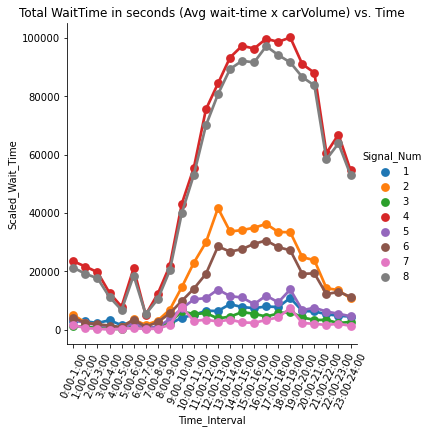

In [22]:
# TOTAL WAIT TIME GRAPH



line = sns.catplot(x = "Time_Interval", y = "Scaled_Wait_Time", hue = "Signal_Num", kind="point", data = df_numeric_avg)
plt.xticks(rotation=65)
#line.ax.set_ylim(0,200000)

plt.title("Total WaitTime in seconds (Avg wait-time x carVolume) vs. Time")

     Signal_Num Time_Interval  Wait_Time Vol_Weight Scaled_Wait_Time  \
0             1     0:00-1:00         35         85             2975   
1             1     1:00-2:00         35         84             2940   
2             1     2:00-3:00         35         67             2345   
3             1     3:00-4:00         35         94             3290   
4             1     4:00-5:00         35         46             1610   
..          ...           ...        ...        ...              ...   
187           8   19:00-20:00         87        995            86565   
188           8   20:00-21:00         82       1021            83722   
189           8   21:00-22:00         67        872            58424   
190           8   22:00-23:00         68        939            63852   
191           8   23:00-24:00         59        900            53100   

    Norm_Wait_Time  
0         0.346086  
1         0.342015  
2         0.272797  
3         0.382731  
4         0.187294  
..       

Text(0.5, 1.0, 'Normalized WaitTime (sec) vs. Time')

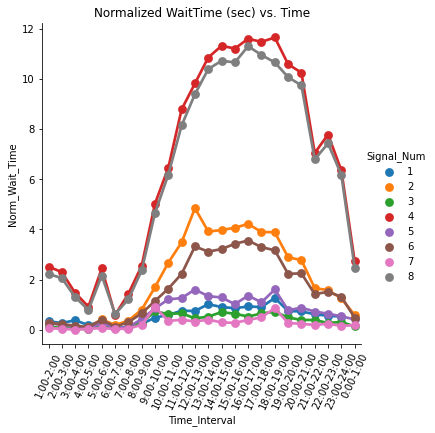

In [23]:
# NORMALIZED WAIT TIME GRAPH

print(df_numeric_avg)

df_final = pd.read_csv("avg_wait_time_scaled_by_traffic_volume.csv")

df_time = df_final

df_time = df_time.reset_index()  #reset index

df_time = df_time.iloc[1: , : ]  # drop first row (bad values)
print(df_time)

line = sns.catplot(x = "Time_Interval", y = "Norm_Wait_Time", hue = "Signal_Num", kind="point", data = df_time)
plt.xticks(rotation=65)
#line.ax.set_ylim(0,40)

plt.title("Normalized WaitTime (sec) vs. Time")

  Signal_Num Total_Wait_Time
1          1         1.26426
2          2         2.99216
3          3        0.758514
4          4         15.1813
5          5         1.29348
6          6         3.15212
7          7        0.379329
8          8         14.7549


Text(0.5, 1.0, 'FULL DAY Total Wait-Time in Hours (Cars x Avg Wait-Time)')

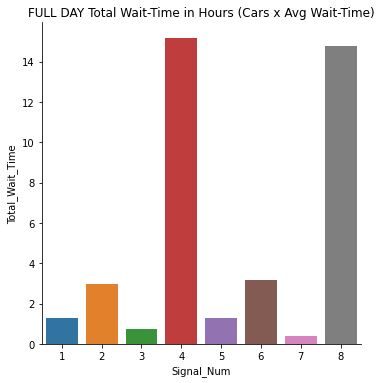

In [24]:
#TOTAL WAIT TIME PER SIGNAL (FULL DAY)


def total_24hr_WaitTime(signalid, df):
    
    total_time = 0
    
    for i in range(len(df)):
        
        if df.loc[i, 'Signal_Num'] == signalid:
            
            total_time += df.loc[i, 'Scaled_Wait_Time']
            
            total_time = total_time / 3600     #choose hours, minutes, or seconds based on denominator
            
    
    return(total_time)


df_24_total = pd.DataFrame(columns=['Signal_Num', 'Total_Wait_Time'])

for i in range(1,9):
    df_24_total.loc[i, 'Signal_Num'] = i 
    df_24_total.loc[i, 'Total_Wait_Time'] =  total_24hr_WaitTime(i, df_numeric_avg)
    
print(df_24_total)



line = sns.catplot(x = "Signal_Num", y = "Total_Wait_Time", kind="bar", data = df_24_total)
#plt.xticks(rotation=65)
#line.ax.set_ylim(0,3600)

plt.title("FULL DAY Total Wait-Time in Hours (Cars x Avg Wait-Time)")

  Signal_Num Total_Wait_Time
1          1         77.2003
2          2         183.315
3          3         46.1674
4          4         929.441
5          5          79.149
6          6          192.74
7          7         23.3413
8          8         903.014


Text(0.5, 1.0, 'FULL DAY Total Wait-Time in Minutes (Cars x Avg Wait-Time)')

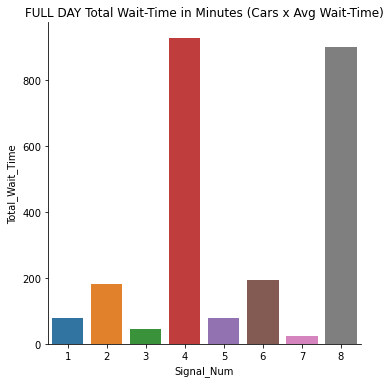

In [25]:
#TOTAL WAIT TIME PER SIGNAL (FULL DAY)


def total_24hr_WaitTime(signalid, df):
    
    total_time = 0
    
    for i in range(len(df)):
        
        if df.loc[i, 'Signal_Num'] == signalid:
            
            total_time += df.loc[i, 'Scaled_Wait_Time']
            
            total_time = total_time / 60     #choose hours, minutes, or seconds based on denominator
            
    
    return(total_time)


df_24_total = pd.DataFrame(columns=['Signal_Num', 'Total_Wait_Time'])

for i in range(1,9):
    df_24_total.loc[i, 'Signal_Num'] = i 
    df_24_total.loc[i, 'Total_Wait_Time'] =  total_24hr_WaitTime(i, df_numeric_avg)
    
print(df_24_total)



line = sns.catplot(x = "Signal_Num", y = "Total_Wait_Time", kind="bar", data = df_24_total)
#plt.xticks(rotation=65)
#line.ax.set_ylim(0,3600)

plt.title("FULL DAY Total Wait-Time in Minutes (Cars x Avg Wait-Time)")

     index  Unnamed: 0  Signal_Num Time_Interval  Wait_Time  Vol_Weight  \
1        1           1           1     1:00-2:00         59          84   
2        2           2           1     2:00-3:00         59          67   
3        3           3           1     3:00-4:00         59          94   
4        4           4           1     4:00-5:00         59          46   
5        5           5           1     5:00-6:00         58          84   
..     ...         ...         ...           ...        ...         ...   
187    187         187           8   19:00-20:00         87         995   
188    188         188           8   20:00-21:00         82        1021   
189    189         189           8   21:00-22:00         67         872   
190    190         190           8   22:00-23:00         68         939   
191    191         191           8   23:00-24:00         59         900   

     Scaled_Wait_Time  Norm_Wait_Time  
1                4956        0.576539  
2                39

Text(0.5, 1.0, 'Total WaitTime in seconds (Avg over day)')

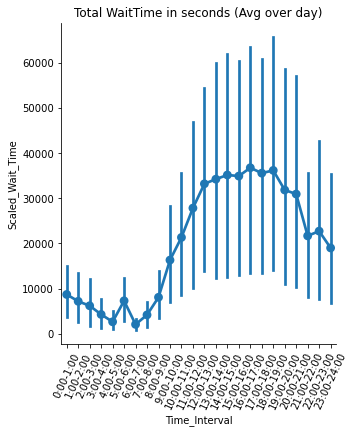

In [113]:
#TOTAL WAIT TIME PER HOUR 

print(df_time)


line = sns.catplot(x = "Time_Interval", y = "Scaled_Wait_Time", kind="point", data = df_numeric_avg)
plt.xticks(rotation=65)
#line.ax.set_ylim(0,200000)

plt.title("Total WaitTime in seconds (Avg over day)")

   Time_Interval Total_Wait_Time_in_Hours
0      0:00-1:00                  17.5817
1      1:00-2:00                  14.6564
2      2:00-3:00                  12.8311
3      3:00-4:00                  8.61472
4      4:00-5:00                  5.37139
5      5:00-6:00                  14.9406
6      6:00-7:00                  4.24417
7      7:00-8:00                  8.74806
8      8:00-9:00                  17.9989
9     9:00-10:00                  37.0828
10   10:00-11:00                  47.1683
11   11:00-12:00                  61.4758
12   12:00-13:00                  72.8936
13   13:00-14:00                    75.41
14   14:00-15:00                  77.4517
15   15:00-16:00                    76.83
16   16:00-17:00                  80.9544
17   17:00-18:00                  78.2678
18   18:00-19:00                  80.7958
19   19:00-20:00                  67.0625
20   20:00-21:00                  65.1067
21   21:00-22:00                  45.0622
22   22:00-23:00                  

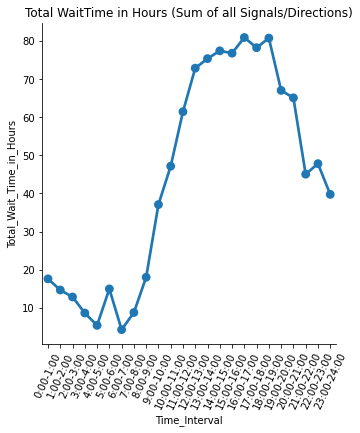

In [26]:
#TOTAL WAIT TIME PER HOUR 


intervals = ['0:00-1:00', '1:00-2:00','2:00-3:00','3:00-4:00','4:00-5:00', '5:00-6:00', '6:00-7:00', '7:00-8:00',
             '8:00-9:00', '9:00-10:00','10:00-11:00','11:00-12:00','12:00-13:00','13:00-14:00','14:00-15:00',
             '15:00-16:00','16:00-17:00','17:00-18:00','18:00-19:00','19:00-20:00','20:00-21:00',
             '21:00-22:00','22:00-23:00', '23:00-24:00']

df_total_sum = pd.DataFrame(columns=['Time_Interval', 'Total_Wait_Time_in_Hours'])

count = 0
for interval in intervals:
    df_total_sum.loc[count, 'Time_Interval'] = interval
    count += 1     #increment counter
    

    
def IntervalTime(interval, df):
    
    total_int_time = 0
    
    for i in range(len(df)):

        if df.loc[i, 'Time_Interval'] == interval:

            total_int_time += df.loc[i, 'Scaled_Wait_Time']

    total_int_time = total_int_time / 3600     #in hours     
    #print(total_int_time)




    return total_int_time


new_count = 0
for interval in intervals:
        df_total_sum.loc[new_count, 'Total_Wait_Time_in_Hours'] = IntervalTime(interval, df_numeric_avg)
        new_count += 1

    
print(df_total_sum)


all_day_sum = sum(df_total_sum['Total_Wait_Time_in_Hours'])


print(all_day_sum)
line = sns.catplot(x = "Time_Interval", y = "Total_Wait_Time_in_Hours", kind="point", data = df_total_sum)
plt.xticks(rotation=65)
#line.ax.set_ylim(0,200000)

plt.title("Total WaitTime in Hours (Sum of all Signals/Directions)")

print("\nTOTAL SUM OF WAIT TIME ALL CARS (HOURS)  = ")
print(all_day_sum)
print("\nTOTAL SUM OF WAIT TIME ALL CARS (MINUTES)  = ")
print(all_day_sum * 60)
print("\nTOTAL SUM OF WAIT TIME ALL CARS (MINUTES)  = ")
print(all_day_sum * 3600)

#df_total_sum['GRAND_TOTAL_Hours'] = all_day_sum
#df_total_sum['GRAND_TOTAL_Minutes'] = all_day_sum * 60
#df_total_sum['GRAND_TOTAL_Seconds'] = all_day_sum *3600

df_total_sum.to_csv("TOTAL_WAIT_TIME.csv", encoding = 'utf-8', index=False)
